In [3]:
# Some useful links
# http://andrewgaidus.com/Analyzing_Race_Results_Part_2/
# https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9
# https://stackoverflow.com/questions/47303027/changing-axis-ticks-in-seaborn-stripplotwhere-x-value-is-a-time-stamp?rq=1
# https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
# https://shocksolution.com/2011/08/17/removing-an-axis-or-both-axes-from-a-matplotlib-plot/
# http://www.datasciencemadesimple.com/rank-dataframe-python-pandas-min-max-dense-rank-group/
# http://www.r-graph-gallery.com/38-rcolorbrewers-palettes/
# https://seaborn.pydata.org/tutorial.html
# https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
# http://colorbrewer2.org/#type=sequential&scheme=OrRd&n=3

In [43]:
import pandas as pd
from decimal import Decimal, ROUND_UP, ROUND_DOWN, ROUND_HALF_UP
import seaborn as sns
from colour import Color
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Widen display area to prevent column wrapping
pd.set_option('display.width', 2000)

In [11]:
df = pd.read_csv( "2018/dh3_leogang/dh3_leogang_m.merged.csv" )
df = df.dropna() # remove DNF/DNS

In [39]:
event = 'dh'
race = 3
gender = 'm'
topX = 20
splits = 5 # Could detect this from dataset, or or they always 5? @todo
image_gen = False
dpi = 300

In [40]:

racename = 'race'
raceName = 'race'
chart_title_prefix = raceName + ( ', Men' if gender == 'm' else ', Women' )

In [31]:
def colorList( col1, col2, cnt, pos1=0, pos2=1, pos3=2 ):
    clrs = list( Color( col1 ).range_to( Color( col2 ) , cnt ) )
    clrs = [ i.web for i in clrs ]
    if pos1 < cnt:
        clrs[pos1] = 'gold'
    if pos2 < cnt:
        clrs[pos2] = 'silver'
    if pos3 < cnt:
        clrs[pos3] = 'peru'

    return clrs

In [12]:
# df.set_index('Name')
# df.rename(columns={'': 'A'}, inplace=True)
# df.reindex_axis(sorted(df.columns), axis=1)

In [13]:
print( df.head() )

    Unnamed: 0  bib    id               name  q_rank  q_split1  q_split2  q_split3  q_split4  q_split5 ...   StartOrder  StartTime      UciCode  UciRank   UciRiderId  UciTeamCode  UciTeamId                   UciTeamName  WorldCupRank  Age
1            1    1  1001         GWIN Aaron      13    48.361    85.469   124.547   169.081   200.424 ...            1   50400000  USA19871224        1  10006516663          YTM       1531                    THE YT MOB             1   30
3            3    4  1004       BROSNAN Troy       7    47.002    83.781   122.684   166.936   197.748 ...            4   50490000  AUS19930713        2  10007307417          CFT       2162  CANYON FACTORY DOWNHILL TEAM             4   24
10          10   17  1017         BRUNI Loic       4    46.232    82.965   122.055   165.441   196.647 ...           17   50880000  FRA19940513        4  10007544358          SGR       1667           SPECIALIZED GRAVITY            17   24
15          15    5  1005  BLENKINSOP Samuel

In [14]:
# from datetime import timedelta

In [18]:
print( df['split1'].max(), df.split1.min() )

46.746 45.525


In [36]:
# Calculate split diff compared to split leader

# df.insert( loc=4, column='s1b', value=df.split1 - df.split1.min() )

In [ ]:
print( df.tail() )

In [ ]:
df.Split1[0]

In [ ]:
# Calculate split diff compared to race winner
df.insert( loc=5, column='s1w', value=df.Split1 - df.Split1[0] )
# df['s1w'] = df.Split1 - df.Split1[0]

In [ ]:
print( df.head() )

In [ ]:
df.insert( loc=7, column='s2b', value=df.Split2 - df.Split2.min())
df.insert( loc=8, column='s2w', value=df.Split2 - df.Split2[0] )

In [ ]:
df.set_index('Name')

In [ ]:
foo = df.loc[df['Name'] == 'NEWELL Jake']['Split2']
print( foo )

In [ ]:
def convertToSeconds( timestring ):
    if ":" in str(timestring):
        minutes, seconds = timestring.split(':')
        timestring = int(minutes)*60 + float(seconds)
    if ( timestring in [ "DNS", "DNF" ] ):
        timestring = float('NaN')
    return float(timestring)

In [ ]:
convertToSeconds( "01:18.9" )

In [ ]:
convertToSeconds( "57.445" )

In [ ]:
df['s1s'] = [ convertToSeconds(x) for x in df['Split1'] ]
df['s2s'] = [ convertToSeconds(x) for x in df['Split2'] ]
df['s3s'] = [ convertToSeconds(x) for x in df['Split3'] ]
df['s4s'] = [ convertToSeconds(x) for x in df['Split4'] ]
df['fs'] = [ convertToSeconds(x) for x in df['Time'] ]

In [ ]:
print( df.tail() )

In [ ]:
if ( "DS" in [ "DNS", "DNF" ] ):
    print ("hello")

In [ ]:
def convertToDelta( timestring ):
#     if ( timestring in [ "DNS", "DNF" ] ):
#         timestring = "0:0:0.0"
#         return timestring
    timestring = str(timestring)

    if ":" not in timestring:
        timestring = str(Decimal( timestring ).quantize( Decimal('.001' ), rounding=ROUND_HALF_UP ))
        timestring = "0:" + timestring

    timestring = "0:" + timestring

    return pd.to_timedelta( timestring )
#     return timestring

In [ ]:
convertToDelta( "01:18.9" )

In [ ]:
convertToDelta( 57.445 )

In [ ]:
# rounding issues
pd.to_timedelta( "0:0:21.526999999999997" )

In [ ]:
# Alternative to Decimal conversion to deal with floating point inaccuracy
n = 21.526999999999997
'%.3f' % round( n, 3 )

In [ ]:
convertToDelta( 21.527 )

In [ ]:
convertToDelta( 20.613 )

In [ ]:
df['s1s'] = [ convertToDelta(x) for x in df['Split1'] ]
df['s1cr'] = df.s1s.rank(method='dense')
df['s1b'] = (df.s1s - df.s1s.min()).dt.total_seconds()
df['s1w'] = (df.s1s - df.s1s[0]).dt.total_seconds()
df['s2s'] = [ convertToDelta(x) for x in df['Split2'] ]
df['s2c'] = df.s2s - df.s1s
df['s2cr'] = df.s2c.rank(method='dense')
df['s2b'] = (df.s2s - df.s2s.min()).dt.total_seconds()
df['s2w'] = (df.s2s - df.s2s[0]).dt.total_seconds()
df['s2cb'] = (df.s2c - df.s2c.min()).dt.total_seconds()
df['s2cw'] = (df.s2c - df.s2c[0]).dt.total_seconds()
df['s3s'] = [ convertToDelta(x) for x in df['Split3'] ]
df['s3c'] = df.s3s - df.s2s
df['s3cr'] = df.s3c.rank(method='dense')
df['s3b'] = (df.s3s - df.s3s.min()).dt.total_seconds()
df['s3w'] = (df.s3s - df.s3s[0]).dt.total_seconds()
df['s3cb'] = (df.s3c - df.s3c.min()).dt.total_seconds()
df['s3cw'] = (df.s3c - df.s3c[0]).dt.total_seconds()
df['s4s'] = [ convertToDelta(x) for x in df['Split4'] ]
df['s4c'] = df.s4s - df.s3s
df['s4cr'] = df.s4c.rank(method='dense')
df['s4b'] = (df.s4s - df.s4s.min()).dt.total_seconds()
df['s4w'] = (df.s4s - df.s4s[0]).dt.total_seconds()
df['s4cb'] = (df.s4c - df.s4c.min()).dt.total_seconds()
df['s4cw'] = (df.s4c - df.s4c[0]).dt.total_seconds()
df['fs'] = [ convertToDelta(x) for x in df['Time'] ]
df['s5s'] = df['fs']
df['s5c'] = df.fs - df.s4s
df['s5cr'] = df.s5c.rank(method='dense')
df['s5b'] = (df.s5s - df.s5s.min()).dt.total_seconds()
df['s5w'] = (df.s5s - df.s5s[0]).dt.total_seconds()
df['s5cb'] = (df.s5c - df.s5c.min()).dt.total_seconds()
df['s5cw'] = (df.s5c - df.s5c[0]).dt.total_seconds()

In [ ]:
pd.set_option('display.max_columns', None)
display( df.head(10) )
# print( df.tail() )

In [ ]:
# df['s1b'] = df.s1s - df.s1s.min()

In [ ]:
df.s1w.min()

In [ ]:
def drawScatter( col, title, xmin=7, xmax=-.5 ):
    df2 = df.sort_values(col, ascending=True)
    df2 = df2.reset_index(drop=True)
    plt.subplots(figsize=(5,7))
    
#     colors = ["gold","silver","peru"] + ["cornflowerblue"]*(len(df2[col])-3)
    colors = ["cornflowerblue"]*(len(df2[col]))
    colors[int(df2.loc[df2['Rank'] == 1].index.values)] = "gold"
    colors[int(df2.loc[df2['Rank'] == 2].index.values)] = "silver"
    colors[int(df2.loc[df2['Rank'] == 3].index.values)] = "peru"
    sizes = [40]*(len(df2[col]))
    sizes[int(df2.loc[df2['Rank'] == 1].index.values)] = 100
    sizes[int(df2.loc[df2['Rank'] == 2].index.values)] = 100
    sizes[int(df2.loc[df2['Rank'] == 3].index.values)] = 100
    
#     print( colors )
#     return
    
    plot = sns.regplot( y=df2.index.values[0:20], x=df2[col][0:20], fit_reg=False, scatter_kws={"color":colors, "s":sizes} )
    plot.invert_yaxis()
    plot.invert_xaxis()
    plt.xlim( xmin, xmax )

    # Chart formatting
    sns.despine()
#     plot.axis('off')
    plot.yaxis.set_visible(False)
    plot.set_frame_on(False)

    sns.set_style('whitegrid')
    plot.grid( color='#EEEEEE', linewidth=1.0 )
    plot.set( xlabel=title )

    # Name column
    coln = "s" + col[1:2] + ( "s" if col[2:3] == "b" else "c" )
    display( coln )

    # Adding point labels
    for row in range( 0, 20 ):
        label = df2.Name[row] + " " + ( formatDelta( df2[coln][row] ) if row==0 else "+" + str(df2[col][row]) )
        x = df2[col][row] + .2
        y = df2.index.values[row] + 0.15
        plot.text( x, y, label, horizontalalignment='right', size='small' )

In [ ]:
# int(df.loc[df['Rank'] == 2]['Number'])
int(df2.loc[df2['Rank'] == 1].index.values)

In [ ]:
def formatDelta( time ):
    return ':'.join(str(time).split(':')[1:3])[:-3]

# print( formatDelta( "00:00:32.050000" ) )

In [ ]:
colors =  ["#91FF61"]*25 + ["#BA61FF"]*25 + ["#91FF61"]*25 + ["#BA61FF"]*25
colors = ["blue"]*len(df2[col])

print( colors)

In [ ]:
df2 = df.sort_values('s1b', ascending=True)
df2 = df2.reset_index(drop=True)
plt.subplots(figsize=(5,7))
plot = sns.regplot( y=df2.index.values[0:20], x=df2['s1b'][0:20], fit_reg=False )
plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( 6, -.5 )
# plt.ylim( 20, 0 )

# Chart formatting
sns.despine()
plot.get_yaxis().set_visible(False)
# plot.grid( b=True, which='major', color='#EEEEEE', linewidth=1.0 )
sns.set_style('whitegrid')
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( xlabel="Split 1 Gaps" )

# Adding point labels
# plot.text( df2.s1b.min() + 0.02, 0.2, df2.Name[0] + " " +str(df2.s1s.min().total_seconds() ), horizontalalignment='right', size='small' )
for row in range( 0, 20 ):
    plot.text( df2.s1b[row] + .2, df2.index.values[row] + 0.15, df2.Name[row] + " " + str( '%.3f' % round( df2.s1s[row].total_seconds(), 3 ) if row==0 else "+" + str(df2.s1b[row]) ) , horizontalalignment='right', size='small'  )

In [ ]:
drawScatter( 's1b', 'Sector 1')

In [ ]:
df2 = df.sort_values('s2cb', ascending=True)
df2 = df2.reset_index(drop=True)
plt.subplots(figsize=(5,7))
plot = sns.regplot( y=df2.index.values[0:20], x=df2['s2cb'][0:20], fit_reg=False )
plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( 6, -.5 )
# plt.ylim( 20, 0 )

# Chart formatting
sns.despine()
plot.get_yaxis().set_visible(False)
# plot.grid( b=True, which='major', color='#EEEEEE', linewidth=1.0 )
sns.set_style('whitegrid')
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( xlabel="Sector 2" )

# Adding point labels
# plot.text( df2.s1b.min() + 0.02, 0.2, df2.Name[0] + " " +str(df2.s1s.min().total_seconds() ), horizontalalignment='right', size='small' )
for row in range( 0, 20 ):
    plot.text( df2.s2cb[row] + .2, df2.index.values[row] + 0.15, df2.Name[row] + " " + str( '%.3f' % round( df2.s2c[row].total_seconds(), 3 ) if row==0 else "+" + str(df2.s2cb[row]) ) , horizontalalignment='right', size='small'  )

In [ ]:
drawScatter( 's2cb', 'Sector 2' )

In [ ]:
df2 = df.sort_values('s2b', ascending=True)
df2 = df2.reset_index(drop=True)
plt.subplots(figsize=(5,7))
plot = sns.regplot( y=df2.index.values[0:20], x=df2['s2b'][0:20], fit_reg=False )
plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( 6, -.5 )
# plt.ylim( 20, 0 )

# Chart formatting
sns.despine()
plot.get_yaxis().set_visible(False)
# plot.grid( b=True, which='major', color='#EEEEEE', linewidth=1.0 )
sns.set_style('whitegrid')
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( xlabel="Split 2" )

# Adding point labels
for row in range( 0, 20 ):
    plot.text( df2.s2b[row] + .2, df2.index.values[row] + 0.15, df2.Name[row] + " " + str( '%.3f' % round( df2.s2s[row].total_seconds(), 3 ) if row==0 else "+" + str(df2.s2b[row]) ) , horizontalalignment='right', size='small'  )

In [ ]:
drawScatter( 's2b', 'Split 2' )

In [ ]:
df2 = df.sort_values('s3cb', ascending=True)
df2 = df2.reset_index(drop=True)
plt.subplots(figsize=(5,7))
plot = sns.regplot( y=df2.index.values[0:20], x=df2['s3cb'][0:20], fit_reg=False )
plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( 6, -.5 )
# plt.ylim( 20, 0 )

# Chart formatting
sns.despine()
plot.get_yaxis().set_visible(False)
# plot.grid( b=True, which='major', color='#EEEEEE', linewidth=1.0 )
sns.set_style('whitegrid')
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( xlabel="Sector 2" )

# Adding point labels
# plot.text( df2.s1b.min() + 0.02, 0.2, df2.Name[0] + " " +str(df2.s1s.min().total_seconds() ), horizontalalignment='right', size='small' )
for row in range( 0, 20 ):
    plot.text( df2.s3cb[row] + .2, df2.index.values[row] + 0.15, df2.Name[row] + " " + str( '%.3f' % round( df2.s3c[row].total_seconds(), 3 ) if row==0 else "+" + str(df2.s3cb[row]) ) , horizontalalignment='right', size='small'  )

In [ ]:
drawScatter( 's3cb', 'Sector 3' )

In [ ]:
df2 = df.sort_values('s3b', ascending=True)
df2 = df2.reset_index(drop=True)
plt.subplots(figsize=(5,7))
plot = sns.regplot( y=df2.index.values[0:20], x=df2['s3b'][0:20], fit_reg=False )
plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( 6, -.5 )
# plt.ylim( 20, 0 )

# Chart formatting
sns.despine()
plot.get_yaxis().set_visible(False)
# plot.grid( b=True, which='major', color='#EEEEEE', linewidth=1.0 )
sns.set_style('whitegrid')
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( xlabel="Split 2" )

# Adding point labels
col = 's3b'
for row in range( 0, 20 ):
    plot.text( df2[col][row] + .2, df2.index.values[row] + 0.15, df2.Name[row] + " " + str( '%.3f' % round( df2.s3s[row].total_seconds(), 3 ) if row==0 else "+" + str(df2.s3b[row]) ) , horizontalalignment='right', size='small'  )

In [ ]:
drawScatter( 's3b', 'Split 3' )

In [ ]:
drawScatter( 's4cb', 'Sector 4' )

In [ ]:
drawScatter( 's4b', 'Split 4' )

In [ ]:
drawScatter( 's5cb', 'Sector 5' )

In [ ]:
drawScatter( 's5b', 'Finish' )

In [ ]:
dfRank = df[['s1cr', 's2cr', 's3cr', 's4cr', 's5cr']][:20].copy()
dfRank

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

plt.figure(figsize=(8, 8))
cmap = sns.cm.rocket_r
map = sns.heatmap(dfRank, annot=True, yticklabels=df.Name[:20], xticklabels=[1,2,3,4,5], cmap=cmap)
# viridis, YlOrRd
# , annot_kws={"size": 20}
# , linewidth=1
map.set( xlabel="Sector" )

In [ ]:
splits = 5
topX = 20
dfSplitRank = df[['s1cr', 's2cr', 's3cr', 's4cr', 's5cr']][:topX].copy()
labelY = df['Name'][:topX].values.tolist()


In [ ]:
cycler(color=['rgb']) * cycler(linestyle=['-','--',':'])

In [ ]:
import matplotlib as mpl
from cycler import cycler

mpl.style.use('seaborn')
# default_cycler = cycler('color', ['r', 'g', 'b', 'y']) + cycler('linestyle', ['-', '--', ':', '-.'])
cyc = cycler(color='bgrcmykbgrcmykbgrcmy') + cycler(linestyle='-------:::::::------')

cyc = cycler(color=['r']) * cycler(linestyle=['-','--',':'])

mpl.rcParams['axes.prop_cycle'] = cyc

# ax.set_prop_cycle(cycler(color=plt.get_cmap('tab20c').colors))

pltX = 1.6 * splits
pltY = 6 * ( topX / 10 )

# fig, ax = plt.subplots()

data = dfSplitRank.T
fig = plt.figure( figsize=(pltX, pltY) )
plt.plot( data, label=True )
# plt.plot( data )
ax = plt.gca()

# ax.set_prop_cycle(None)

ax.invert_yaxis()

# plt.set_cmap(plt.get_cmap('OrRd'))


plt.box(on=None)

plt.xlabel( "Split")
# locs, labels = plt.yticks()

maxY = int(dfSplitRank['s1cr'].max()+1)
plt.yticks( [1]+list(range( 5, maxY, 5 )), [1]+list(range( 5, maxY, 5 )) )

plt.xticks( range( 0, splits ), range( 1, splits+1 ) )
plt.grid( False, which='major', axis='y' )

handles, labels = ax.get_legend_handles_labels()
ax.legend( handles, labelY, loc=1, labelspacing=0.58, bbox_to_anchor=(1.4, 0.972)) #, handletextpad=1

# n = 6w
# color = plt.cm.coolwarm(np.linspace(0.1,0.9,n)) # This returns RGBA; convert:
# hexcolor = map(lambda rgb:'#%02x%02x%02x' % (rgb[0]*255,rgb[1]*255,rgb[2]*255),tuple(color[:,0:-1]))
# mpl.rcParams['axes.color_cycle'] = hexcolor

# mpl.rcParams['image.cmap'] = 'jet'

# from cycler import cycler





# plt.tight_layout()
plt.show()


In [ ]:
# *Meant* to allow labellign each line on the chart
for i in range( 1, splits+1 ):
    col = 'split' + str(i) + ( '_sector' if i > 1 else '' )
    display( df[col].min() )

In [ ]:
import random
r = lambda: random.randint(0,255)
def rCol():
    return ('#%02X%02X%02X' % (r(),r(),r()))

cols = [ rCol() for i in range( 0, 60 ) ]
cols

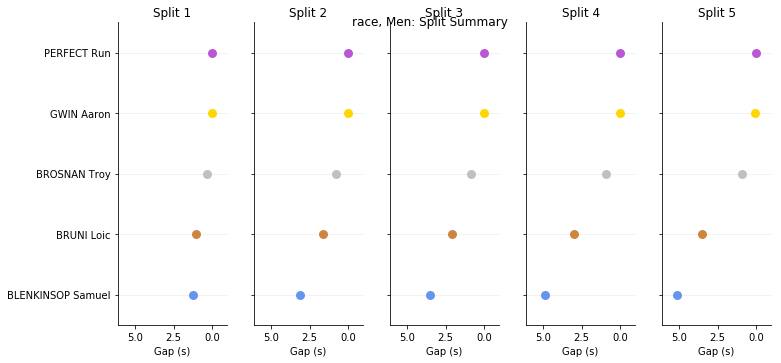

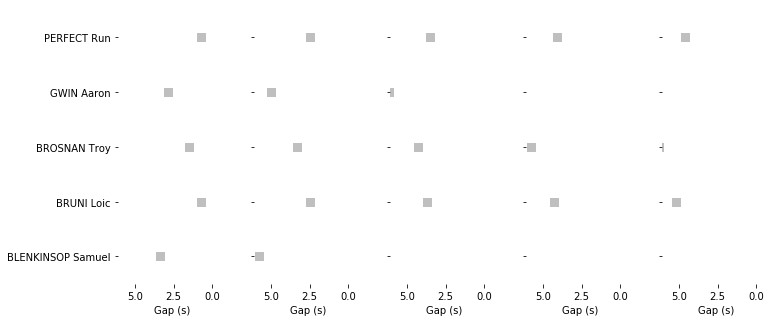

In [41]:
# Attemptin to overlay quali splits with race splits for topX in summary
dfm = df

# https://seaborn.pydata.org/examples/pairgrid_dotplot.html
# display( list(dfm.columns ))
data = dfm[[ 'name', 'rank', 'split1', 'split2_sector', 'split3_sector', 'split4_sector', 'split5_sector', 'q_split1', 'q_split2_sector', 'q_split3_sector', 'q_split4_sector', 'q_split5_sector' ]].copy()
best = pd.DataFrame( [[ 'PERFECT Run', 0, dfm['split1'].min(), dfm['split2_sector'].min(), dfm['split3_sector'].min(), dfm['split4_sector'].min(), dfm['split5_sector'].min(), dfm['q_split1'].min(), dfm['q_split2_sector'].min(), dfm['q_split3_sector'].min(), dfm['q_split4_sector'].min(), dfm['q_split5_sector'].min() ]], columns=data.columns )
data = data.append( best ).sort_values( 'rank' ).reset_index( drop=True )
data['split1_sector'] = data['split1']
data['q_split1_sector'] = data['q_split1']

# Expand data set
for pfx in [ '', 'q_' ]:
#     data[pfx + 'split1_sector'] = data[pfx + 'split1']
    for i in range( 1, splits+1 ):
        split = pfx + 'split' + str(i)
        sector = split + '_sector'

        if 1 < i:
            data[split] = data[pfx + 'split' + str(i-1)] + data[sector]

        data[split + '_rank'] = data[split].rank(method='dense')

        if 'q_' != pfx:
            data[split + '_vs_best'] = ( data[split] - data[split].min() )
        else:
            # Difference back from race split to quali split
            # q_splitX_vs_SELF = ( splitX - splitX.min ) + ( splitX - q_splitX )
            data[split + '_vs_best'] = ( data[split[2:]] - data[split[2:]].min() ) + ( data[split] - data[split[2:]] )
data['rank'] = data['split5_rank']

# Rearrange columns
data = data[list(data.columns[:2]) + list(sorted(data.columns[2:]))]

# Make the PairGrid
g = sns.PairGrid( data[:topX], x_vars=['split1_vs_best', 'split2_vs_best', 'split3_vs_best', 'split4_vs_best', 'split5_vs_best'], y_vars=["name"], size=5, aspect=.4 )
g1 = sns.PairGrid( data[:topX], x_vars=['q_split1_vs_best', 'q_split2_vs_best', 'q_split3_vs_best', 'q_split4_vs_best', 'q_split5_vs_best'], y_vars=["name"], size=5, aspect=.4 )
# g = sns.PairGrid( data[:topX], x_vars=['split1_vs_best','q_split1_vs_best', 'split2_vs_best','q_split2_vs_best', 'split3_vs_best','q_split3_vs_best', 'split4_vs_best','q_split4_vs_best', 'split5_vs_best','q_split5_vs_best'], y_vars='name', size=5, aspect=.4 )


# Draw a dot plot using the stripplot function
colors = colorList( '#6495ED', '#6495ED', len(data), 1, 2, 3 )
colors[0] = 'mediumorchid'
g.map( sns.stripplot, size=9, orient='h', palette=colors, edgecolor='gray', marker='o' )
g1.map( sns.stripplot, size=9, orient='h', color='grey', edgecolor='gray', marker='s', alpha=0.5 )

# Use the same x axis limits on all columns and add better labels
g.set( xlim=(data[:topX]['split5_vs_best'].max()+1, -1), xlabel="Gap (s)", ylabel="" ) # xlim=(0, 25),
g1.set( xlim=(data[:topX]['split5_vs_best'].max()+1, -1), xlabel="Gap (s)", ylabel="" ) # xlim=(0, 25),

# Use semantically meaningful titles for the columns
titles = ["Split 1", "Split 2", "Split 3", "Split 4", "Split 5"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid( False )
    ax.yaxis.grid( color='#EEEEEE' )

# Chart Visuals
sns.despine( left=True, bottom=True )
plt.subplots_adjust( top=0.88 )
g.fig.suptitle( chart_title_prefix + ': Split Summary' )

# Image export
if image_gen:
    plt.gcf().subplots_adjust(left=0.22)
    plt.savefig( file_prefix + '_split_summary.png', dpi=dpi )

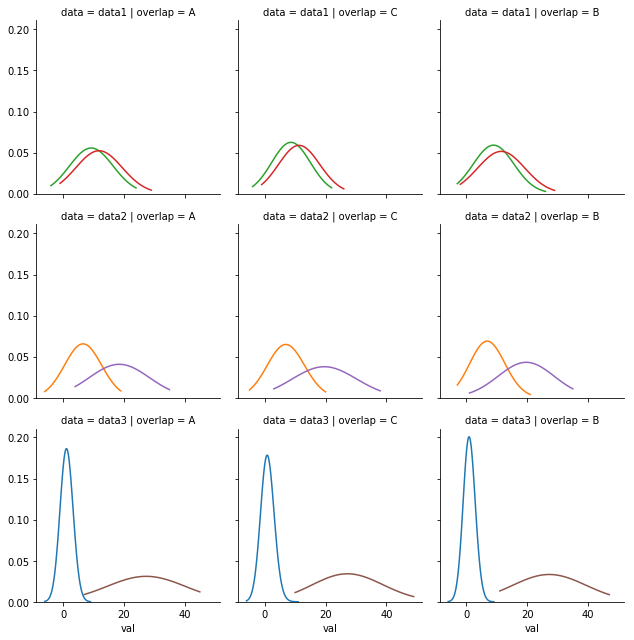

In [44]:

def get_data(n=266, s=[5,13]):
    val = np.c_[np.random.poisson(lam=s[0], size=n),
                np.random.poisson(lam=s[1], size=n)].T.flatten()
    comp = [s[0]]*n +  [s[1]]*n
    ov = np.random.choice(list("ABC"), size=2*n)
    return pd.DataFrame({"val":val, "overlap":ov, "comp":comp})

data1 = get_data(s=[9,11])
data2 = get_data(s=[7,19])
data3 = get_data(s=[1,27])

#option1 combine
for i, df in enumerate([data1,data2,data3]):
    df["data"] = ["data{}".format(i+1)] * len(df)

data = data1.append(data2)
data = data.append(data3)

bw = 2
a = sns.FacetGrid(data, col="overlap",  hue="comp", row="data")
a = (a.map(sns.kdeplot, "val",bw=bw ))
plt.show()